In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic_dataset.csv",index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [4]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


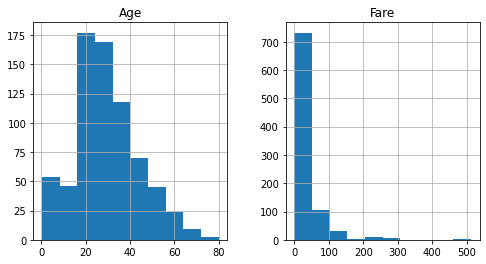

In [6]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,4))
plt.show()

In [7]:
import missingno

<AxesSubplot:>

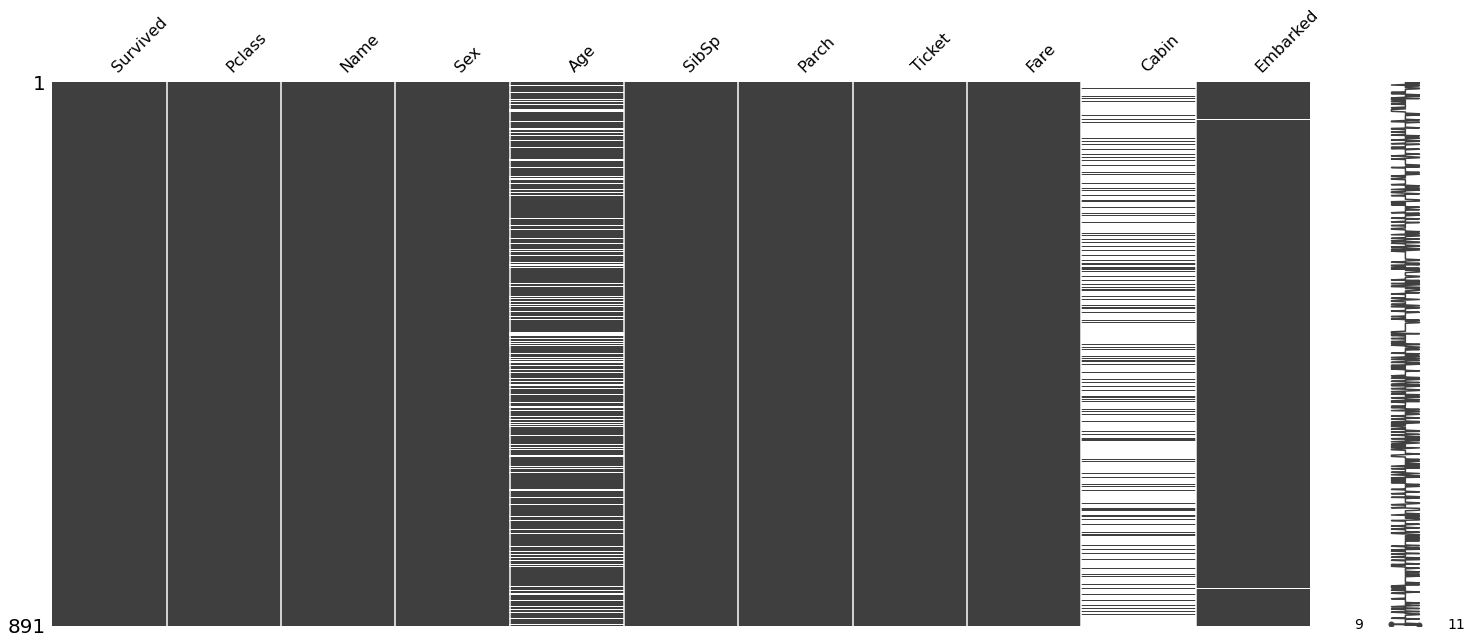

In [8]:
# Missing data in test set
missingno.matrix(df)

In [9]:
df[['Embarked']]=df[['Embarked']].fillna(df['Embarked'].mode()[0])
df['Age']= df['Age'].fillna(df['Age'].mean())
df[['Cabin']]=df[['Cabin']].fillna(df['Cabin'].mode()[0])

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

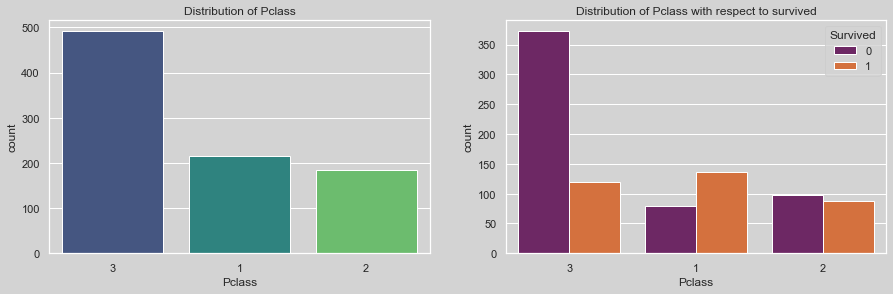

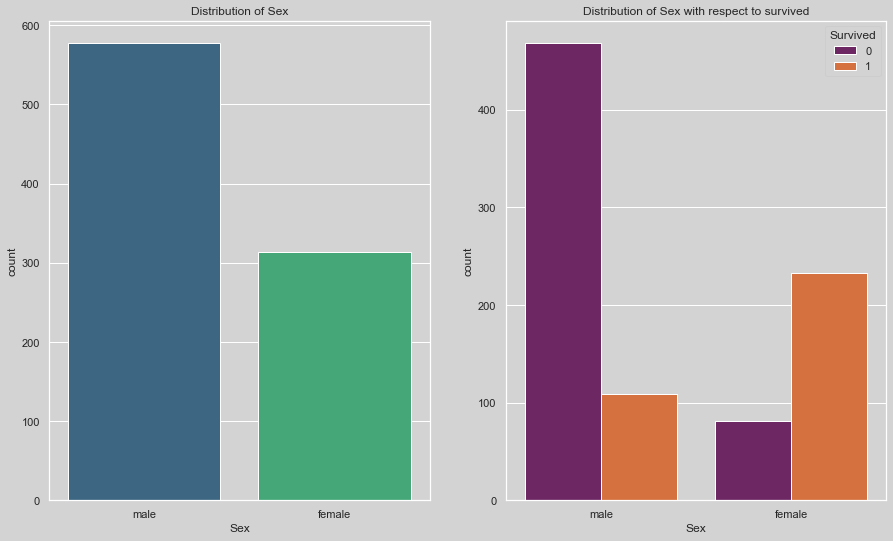

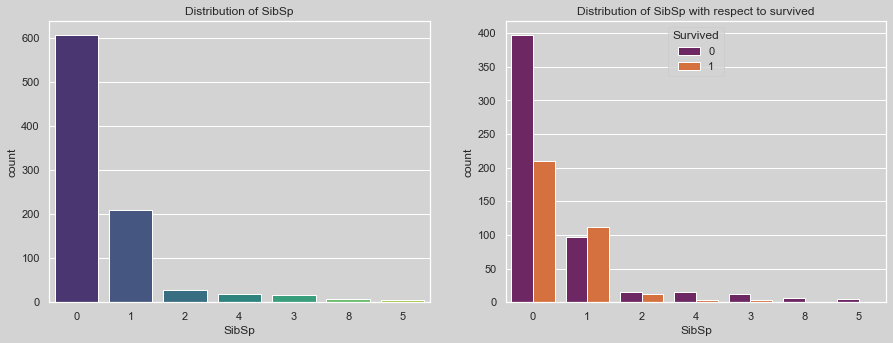

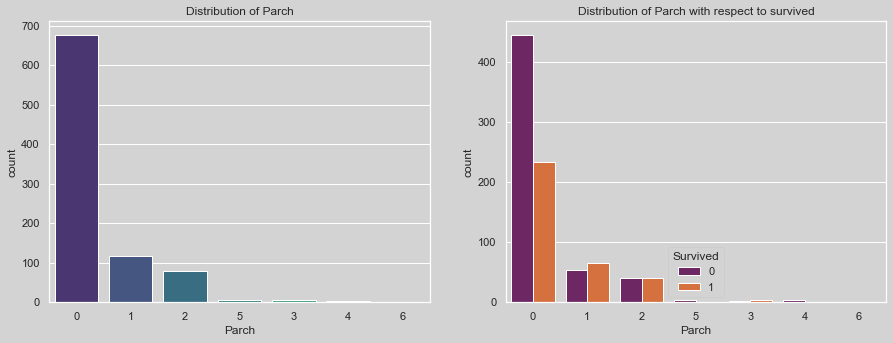

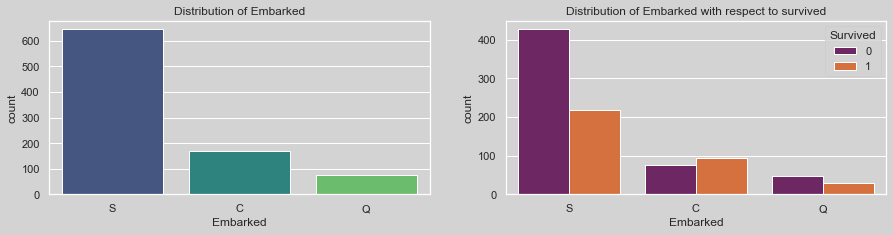

In [11]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

columns =["Pclass","Sex","SibSp","Parch","Embarked" ]

for i in columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(i), 2, 1)
    sns.countplot(x=df[i],order=df[i].value_counts().index,palette="viridis")
    plt.title('Distribution of {}'.format(i))
    
    plt.subplot(len(i), 2, 2)
    sns.countplot(x=df[i],order=df[i].value_counts().index,hue=df["Survived"],palette="inferno")
    plt.title('Distribution of {} with respect to survived'.format(i))
    plt.show() 

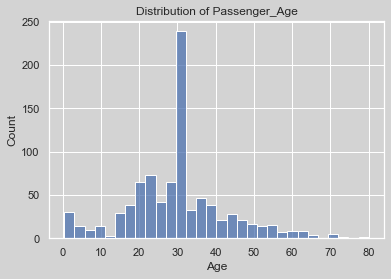

In [12]:
#checking the distribution of 'Age' column
sns.histplot(df['Age'])
plt.title('Distribution of Passenger_Age')
plt.show()

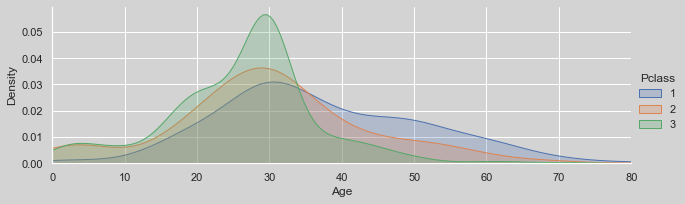

In [13]:
#Age Class Distribution
age_class = sns.FacetGrid(df, hue = 'Pclass', aspect = 3)
age_class.map(sns.kdeplot,'Age', shade=True)
age_class.set(xlim=(0,80))
age_class.add_legend()
plt.show()

In [14]:
#Checking with the box plot for outliers

<Figure size 1224x1224 with 0 Axes>

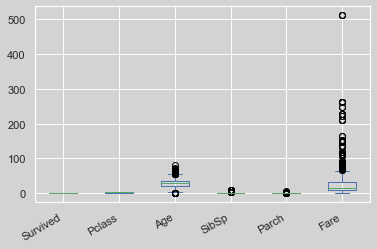

In [15]:
plt.figure(figsize=(17,17))
df.plot(kind='box',vert=True)
plt.gcf().autofmt_xdate()

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
Q1=np.percentile(df["Fare"],25,interpolation="midpoint")
Q2=np.percentile(df["Fare"],50,interpolation="midpoint")
Q3=np.percentile(df["Fare"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 7.9104
Q2: 14.4542
Q3: 31.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\1232499393.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df["Fare"],25,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\1232499393.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df["Fare"],50,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\1232499393.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' 

In [18]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

IQR: 23.0896
low_limit: -26.724
upper_limit: 65.6344


{'whiskers': [<matplotlib.lines.Line2D at 0x1cd27b254b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd27b275e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd27b258d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd27b268f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd27b24130>],
 'means': []}

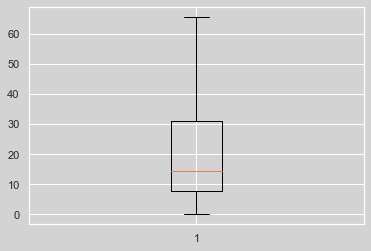

In [19]:
outlier=[]
for x in df["Fare"]:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
df["Fare"]=np.where(df["Fare"]>up_limit,up_limit,np.where(df["Fare"]<low_limit,low_limit,df["Fare"]))
plt.boxplot(df["Fare"])

In [20]:
Q1=np.percentile(df["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(df["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(df["SibSp"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 0.0
Q2: 0.0
Q3: 1.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\2172012311.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df["SibSp"],25,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\2172012311.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df["SibSp"],50,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\2172012311.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint

In [21]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

IQR: 1.0
low_limit: -1.5
upper_limit: 2.5


In [22]:
Outlier=[]
for x in df["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)

In [23]:
df["SibSp"]=np.where(df["SibSp"]>up_limit,up_limit,np.where(df["SibSp"]<low_limit,low_limit,df["SibSp"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd274ce620>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd274ce920>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd274cde70>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd274cef50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd274cf8b0>],
 'means': []}

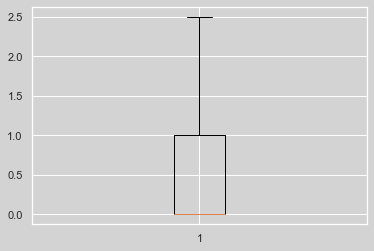

In [24]:
plt.boxplot(df["SibSp"])

In [25]:
Q1=np.percentile(df["Age"],25,interpolation="midpoint")
Q2=np.percentile(df["Age"],50,interpolation="midpoint")
Q3=np.percentile(df["Age"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 22.0
Q2: 29.69911764705882
Q3: 35.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\41342358.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(df["Age"],25,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\41342358.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(df["Age"],50,interpolation="midpoint")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16156\41342358.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are enco

In [26]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

IQR: 13.0
low_limit: 2.5
upper_limit: 54.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1cd270bf640>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd270bfd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd270bcaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd270bf7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd270bf6a0>],
 'means': []}

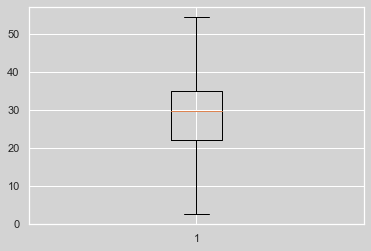

In [27]:
Outlier=[]
for x in df["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)
df["Age"]=np.where(df["Age"]>up_limit,up_limit,np.where(df["Age"]<low_limit,low_limit,df["Age"]))
plt.boxplot(df["Age"])

<AxesSubplot:>

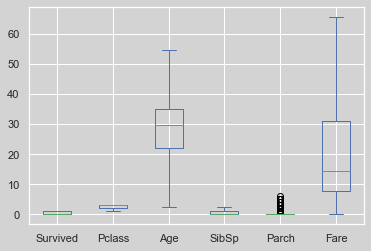

In [28]:
df.plot(kind='box', vert=True)

In [29]:
df["Family"]=df["SibSp"]+df["Parch"]
df=df.drop(["Parch","SibSp","Name","Ticket","Cabin"],axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
df['Sex'] = ln.fit_transform(df['Sex'])     

In [31]:
df=pd.get_dummies(df)
df

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,22.000000,7.2500,1.0,0,0,1
2,1,1,0,38.000000,65.6344,1.0,1,0,0
3,1,3,0,26.000000,7.9250,0.0,0,0,1
4,1,1,0,35.000000,53.1000,1.0,0,0,1
5,0,3,1,35.000000,8.0500,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,13.0000,0.0,0,0,1
888,1,1,0,19.000000,30.0000,0.0,0,0,1
889,0,3,0,29.699118,23.4500,3.0,0,0,1


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df)

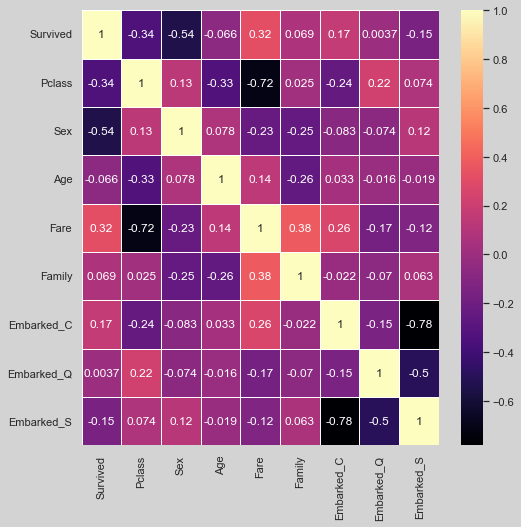

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

#### Modelling

In [34]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

##### Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
GNB=GaussianNB()
model=GNB.fit(x_train,y_train)
predict=model.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(predict,y_test))
print("Confusion Matrix \n" ,confusion_matrix(predict,y_test))

The accuracy of the NaiveBayes is 0.770949720670391
Confusion Matrix 
 [[79 15]
 [26 59]]


In [37]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
mm=classifier.fit(x_train,y_train)
pred=mm.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(pred,y_test))
print("Confusion Matrix \n" ,confusion_matrix(pred,y_test))

The accuracy of the NaiveBayes is 0.7821229050279329
Confusion Matrix 
 [[84 18]
 [21 56]]


##### hyperparameter tuning

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [39]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7597765363128491
